### Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Read Data File & create Data Frame

In [3]:
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Naresh IT Class\Data Files\winequality_red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Data Prepration for Machine Learning
- we divided  the data into 2 parts input data & output data
- input data = x & output data = y
- again we divide input data into two parts x_train & x_test
- again we divide output data into two parts y_train & y_test
- model developement heppen on x_train & y_train
- Model is will make prediction by taking x_test data and this called y_prediction
- y_prediction is now compaired with y_test


In [9]:
x = df.drop('quality', axis=1)
y = df['quality']

we use train test split from model selection
it will take follwing parameter
    - x : input data
    - y : output data
    - test_size : 0.2  20% test data and 80% train data
    - by deafault its 25:75
    -random_state
        - we want to select observation randomly
        - many possible combination
        - Every possible combination is represent as a number
        - 1,2,3,4,5,6,7,8,9,10
        - select 5 number randonly : how many combinations 10c5
        - random_state = 42 # 42 is number of combination


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,# input data
                                                    y,# output data
                                                    test_size=0.2, # data split ratio
                                                    random_state=1234 ) # which combination id is selected 

In [12]:
x_train.shape, x_test.shape

((1279, 11), (320, 11))

In [13]:
y_train.shape, y_test.shape

((1279,), (320,))

### check point 1
- check the shape

In [14]:
print("the shape of data frame", df.shape)
print("the shape of x_train data ", x_train.shape)
print("the shape of x_test data", x_test.shape)
print("the shape of y_train data", y_train.shape)
print("the shape of y_test data ", y_test.shape)

the shape of data frame (1599, 12)
the shape of x_train data  (1279, 11)
the shape of x_test data (320, 11)
the shape of y_train data (1279,)
the shape of y_test data  (320,)


### check point 2 
- Check the observation index of x_train and y_train both should match
- simillerly check index for x_test and y_test both also match

In [15]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
441,11.9,0.40,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3
227,9.0,0.82,0.14,2.60,0.089,9.0,23.0,0.99840,3.39,0.63,9.8
1386,7.4,0.64,0.07,1.80,0.100,8.0,23.0,0.99610,3.30,0.58,9.6
1245,7.4,0.55,0.19,1.80,0.082,15.0,34.0,0.99655,3.49,0.68,10.5
60,8.8,0.40,0.40,2.20,0.079,19.0,52.0,0.99800,3.44,0.64,9.2


In [16]:
y_train.head()

441     6
227     5
1386    5
1245    5
60      5
Name: quality, dtype: int64

In [17]:
x_test.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
351,9.1,0.795,0.00,2.6,0.096,11.0,26.0,0.99940,3.35,0.83,9.4
415,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3
564,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5
147,7.6,0.490,0.26,1.6,0.236,10.0,88.0,0.99680,3.11,0.80,9.3


In [18]:
y_test.tail()

351     6
415     5
564     6
1124    4
147     5
Name: quality, dtype: int64

### Model Developement
- import the package
- save the package
- apply fit transform
- from sklearn.< model_name > import < Model class >

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
LR = LinearRegression() # create object of Linear Regression Class
LR.fit(x_train,y_train) # with the object name call the fit Method on Data

LinearRegression()

### Model Predictions
- Model Prediction happens on x_test

In [21]:
y_prediction = LR.predict(x_test)

In [22]:
y_prediction

array([5.18402693, 5.35222632, 5.59491103, 5.52091961, 6.34175415,
       5.39173054, 5.4386121 , 5.95987316, 5.47004148, 6.91005691,
       4.98509136, 5.23277066, 5.69063919, 5.52790309, 5.51816101,
       5.25774342, 4.97138685, 5.12531479, 6.16831487, 5.17480772,
       5.11570282, 5.84314362, 5.18881658, 5.47252159, 5.7234016 ,
       6.30684795, 5.29979062, 5.56538456, 6.00395044, 5.51753047,
       4.75589372, 6.22649885, 5.24955921, 5.61323762, 5.54866083,
       5.4907831 , 6.35361446, 5.23982145, 5.561088  , 5.81104267,
       5.21412309, 6.08767487, 5.71655198, 5.34443848, 5.65810399,
       5.02362366, 4.94708499, 5.80532814, 6.37676041, 5.54270371,
       4.92835023, 5.73605681, 6.61798021, 6.15855747, 5.3704761 ,
       5.11932029, 6.22074911, 5.2262822 , 6.44385318, 5.26198348,
       5.28301604, 5.12118822, 5.12443471, 5.59218111, 5.02408579,
       6.1394565 , 5.71787898, 6.31942795, 5.27013911, 6.0846879 ,
       5.72948584, 5.53327202, 5.25038298, 6.17460327, 5.56538

#### Passing 1 row only for prediction

In [23]:
# if i want only 1 row of data then do this 

y_prediction_1row = LR.predict([x_test.iloc[0].values])
y_prediction_1row
# if we want  to pass 2 or 3 rows  of data then 
# y_prediction_1row = LR.predict([x_test.iloc[0].values,x_test.iloc[1].values])

array([5.18402693])

### Model Evaluation Metrix
- from sklearn.metrics import r2_score, mean_squared_error

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
R2 = r2_score(y_test,y_prediction)
MSE =mean_squared_error(y_test, y_prediction)
# MSE 1/2
RMSE = np.sqrt(MSE)
print(R2)
print(MSE)
print(RMSE)


0.3675833642751606
0.37988847343818943
0.6163509336718729


In [26]:
# accuracy_score is for classification problem not for regression
# accuracy_score = accuracy_score(y_test,y_prediction)
# print('accuracy_score',accuracy_score)

### Batch predicition
- After model development we pass batch of input
- in the above example we are passing a single observation 
- this is called Batch prediction

**Real time or Endpoint Prediction**
- After model developement will pass a single observation 
- It will give the quick response
- so that its called Real time prediction

**Note**
- Number of values we are passing in a list = number of columns
-On how many cols your model is trained that many 

In [27]:
LR.predict([[12,5,0.1,-2,13,6,2,45,2,63,-25]]) # passing random values

array([-783.57974077])

In [29]:
#LR.predict([[12,5,0.1,-2,13,6,2,45,2,63]])
# if we give less values then total 
# ValueError: X has 10 features, but LinearRegression is expecting 11 features as input.

In [30]:
x_test.shape,y_test.shape,y_prediction.shape

((320, 11), (320,), (320,))

In [31]:
test_data = x_test
test_data['y_actual'] = y_test
test_data['y_prediction'] = y_prediction
test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_actual,y_prediction
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5,5.184027
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3,5,5.352226
726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1,6,5.594911
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6,5.520920
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7,6.341754
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,9.1,0.795,0.00,2.6,0.096,11.0,26.0,0.99940,3.35,0.83,9.4,6,5.220242
415,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,5,5.146454
564,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6,6.276580
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5,4,5.777331


In [32]:
# y_test is series
# y_prediction is numpy array values
print(y_test.values[:5])
print(y_prediction[:5])

[5 5 6 6 7]
[5.18402693 5.35222632 5.59491103 5.52091961 6.34175415]


### MSE Manually code

step 1 : we already has y_actual (y_test) data and y_prediction(model prediction)

step 2 :  with for loop we will each value and subtract both 

step 3 : square the subtraction and append in the list

step 4 : Get the sum of all the values in the list

step 5 : Divide by len(y_test) or len(y_pediction) both are same

In [45]:
list_value = []
for i in range(len(y_test)):
    num = y_test.values[i] - y_prediction[i]
    list_value.append(num**2)

sum(list_value)/len(y_test)


0.37988847343818943

In [47]:
# calculate the distance between v1 and v2
v1 = [(1,2),(3,4),(5,7)]
v2 = (10,20)


### Feature selection in regression problem 
- p-value concept
- H_o = there is no relation between independent and dependent variable
- H_1 = there is a relation between independent and dependent variable
    - p > alpha : not reject the null hypothesis



**sklearn package will not give the p-value**

**so for p-values we need to use stat model package**

**inside stst model we have OLS method avilable**

### Stat.OLS method

In [48]:
from statsmodels.api import OLS

In [50]:
OLS(y_train,x_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8645.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:55:40   Log-Likelihood:                         -1270.3
No. Observations:                1279   AIC:                                      2563.
Df Residuals:                    1268   BIC:                                      2619.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0084      0.019     -0.450      0.653      -0.045       0.028
volatile acidity        -1.1035      0.134     -8.256      0.000      -1.366      -0.841
citric acid             -0.1079      0.165     -0.654      0.513      -0.432       0.216
residual sugar           0.0063      0.013      0.469      0.639      -0.020       0.033
chlorides               -1.7285      0.460     -3.760      0.000      -2.630      -0.827
free sulfur dioxide      0.0050      0.002      2.063      0.039       0.000       0.010
total sulfur dioxide    -0.0037      0.001     -4.429      0.000      -0.005      -0.002
density                  4.7359      0.706      6.710      0.000       3.351       6.121
pH                      -0.5526      0.180     -3.068      0.002      -0.906      -0.199
sulphates                0.8218      0.123      6.696      0.000       0.581       1.063
alcohol                  0.2988      0.020     15.289      0.000       0.260       0.337
==============================================================================
Omnibus:                       15.143   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.632
Skew:                          -0.152   Prob(JB):                     5.46e-05
Kurtosis:                       3.526   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
### based on alpha = 0.05
### we remove 3 columns : fixed acidity, citric acid, residual sugar
### Now we again train the model on rest of the columns


### Correlation between the features 

In [53]:
cols = ['fixed acidity', 'citric acid', 'residual sugar']
new_data = df.drop(cols,axis=1)

In [54]:
new_data.head()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

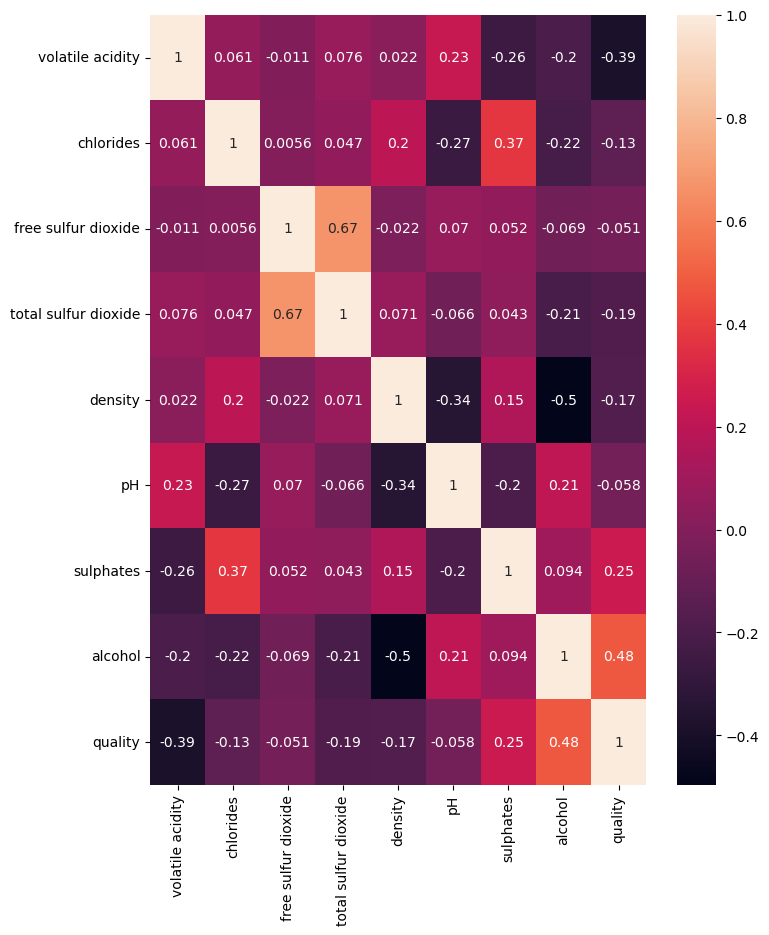

In [59]:
corr = new_data.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corr,annot=True)

### From above correlation 
- Total sulpher dioxide and free sulpher dioxide are highly positively correlated
- 0.67
- we can remove any one  of them
### Remove the column which is having less correlation with output column


In [57]:
new_data.columns

Index(['volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

<Axes: xlabel='free sulfur dioxide', ylabel='quality'>

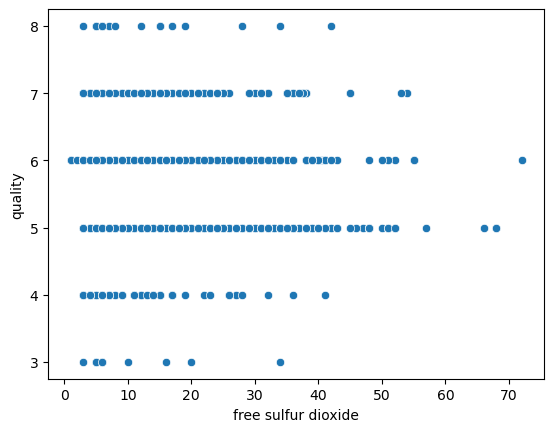

In [60]:
sns.scatterplot(data=new_data,x='free sulfur dioxide', y='quality')

<Axes: xlabel='total sulfur dioxide', ylabel='quality'>

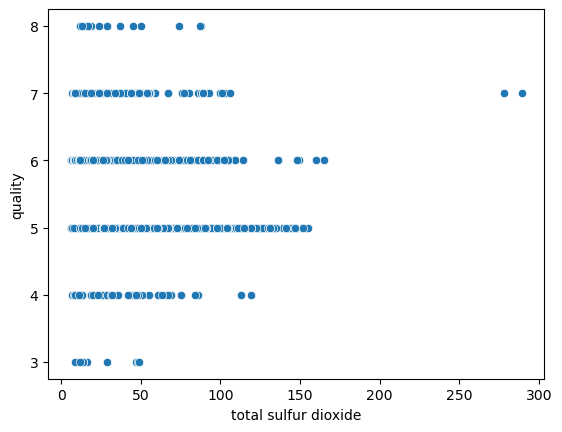

In [61]:
sns.scatterplot(data=new_data,x='total sulfur dioxide', y='quality')

<Axes: xlabel='volatile acidity', ylabel='quality'>

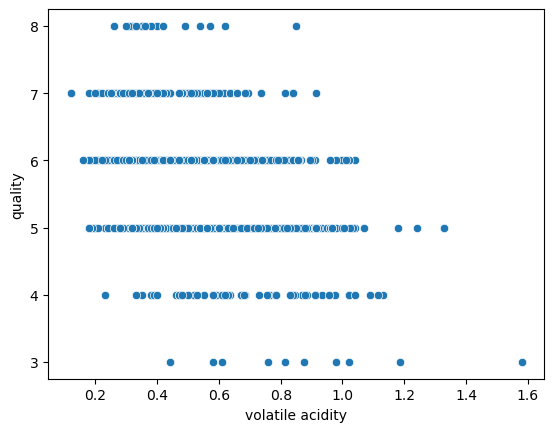

In [64]:
sns.scatterplot(data=new_data,x='volatile acidity', y='quality')

### Method : 3  variance thershold method
- some time column value is not varying much 
- for example in Loan prediction data : we have a column loan term 360
- the data is not vary across, then we can remove those column
- every data has some variance available
- if the variance is zero means, the data is not varying
- the data has most of the time only one values is there
- it is available sklear.feature selection
